In [95]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

In [96]:
#Import core single cell tools

import scanpy as sc
import anndata as ad

In [97]:
#import data
!wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad

--2025-11-23 16:38:19--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-11-23 16:38:19--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad.1’

bone_marrow.h5ad.1  100%[===================>] 338.09M  39.6MB/s    in 5.9s    

2025-11-23 16:38:25 (57.3 MB/s) - ‘bone_marrow.h5ad.1’ saved [354509549/3

In [98]:
bone_marrow_adata = sc.read_h5ad('bone_marrow.h5ad')

In [99]:
print(bone_marrow_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [100]:
# the dimensions of our dataset
bone_marrow_adata.shape

(14783, 17374)

In [101]:
# let's look at the first 5 rows describing the genes in our dataset
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [102]:
# let's look at the first 5 rows describing the cells (ID) in our dataset
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [103]:
# How about both. in a proper dataframe format

bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# A useful step for older datasets
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()

In [105]:
#Let's search for possible contamination from dying cells, ribosomal transcripts or hemoglobin

#Cells with a high proportion of mitochondrial reads (say >10–20%) are likely stressed, apoptotic, or poorly captured
#Ribosomal transcripts are removed because they represent global transcriptional activity, not cell-type-specific biology
#Instead of true cell populations, high HB signal often represents ambient RNA contamination from lysed red blood cells

bone_marrow_adata.var['MT'] = bone_marrow_adata.var_names.str.startswith("MT-")
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var_names.str.startswith("RPS", "RPL")
bone_marrow_adata.var['HB'] = bone_marrow_adata.var_names.str.startswith("^HB[^(P)]")

In [106]:
#let's just take a quick look at one of them.

mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
mt_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB


In [107]:
#calculate the qc metrics

sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [108]:
#note that it is also included in the headers of obs

bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
#and your gene list
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


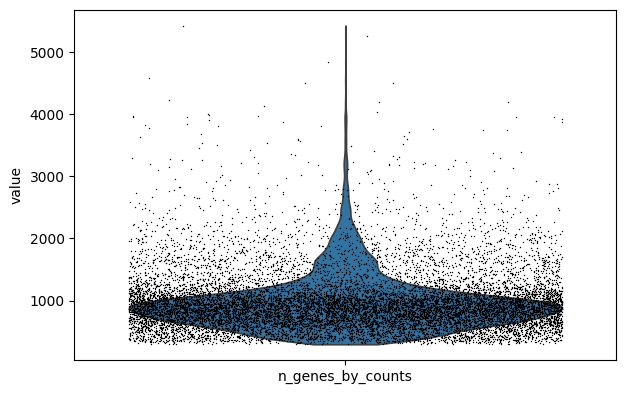

In [110]:
#what is the average number of genes that have at least one detected identifier in each cell.
#in other words, the number of genes expressed in each cell

sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

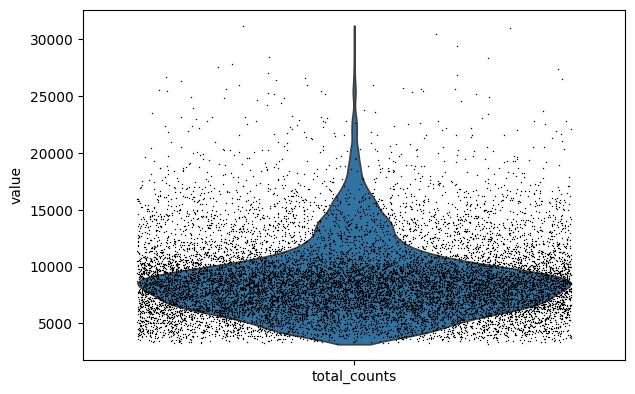

In [111]:
#What is the total number of molecules (UMI) detected in a cell.
#basically you can have 10 UMI molecules but they are all pointing to the same gene.

sc.pl.violin(
    bone_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

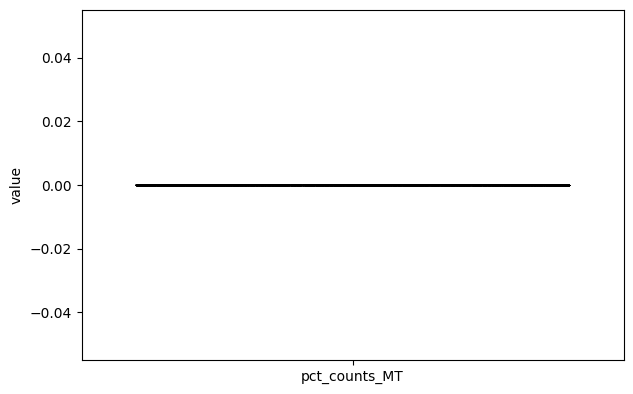

In [112]:
#what about those mitochondrial genes?
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

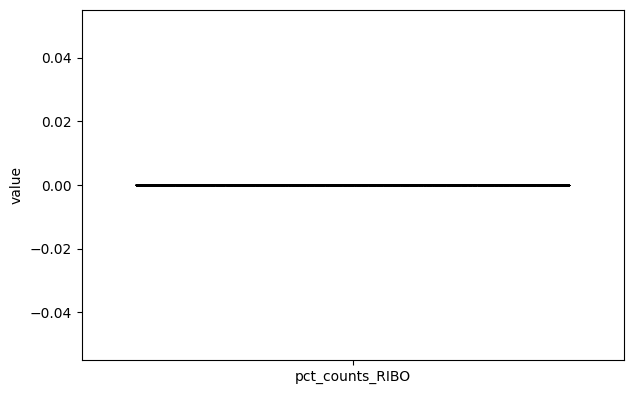

In [113]:
#and the ribosomal genes
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

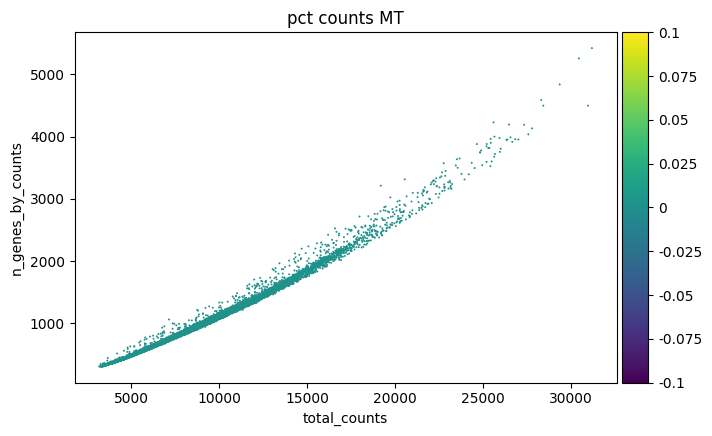

In [114]:
#let's visualize the three of them. And let's see where the mitochondrial genes are
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

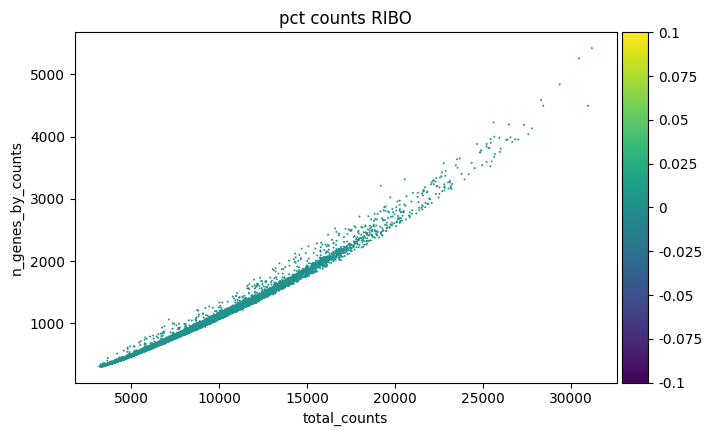

In [115]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

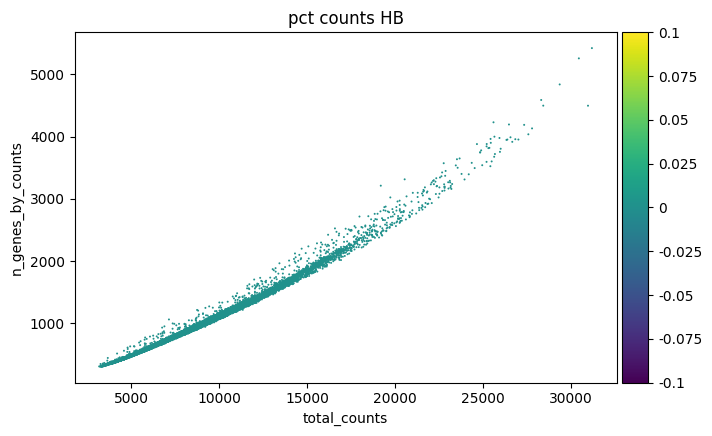

In [116]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [117]:
"""
Additionally, it is important to note that for datasets with multiple batches,
quality control should be performed for each sample individually as quality
control thresholds can vary substantially between batches.
"""

'\nAdditionally, it is important to note that for datasets with multiple batches,\nquality control should be performed for each sample individually as quality\ncontrol thresholds can vary substantially between batches.\n'

In [118]:
#Let's use the data MT plot to select things to remove
sc.pp.filter_cells(bone_marrow_adata, min_genes=1000)
sc.pp.filter_genes(bone_marrow_adata, min_cells=1000)

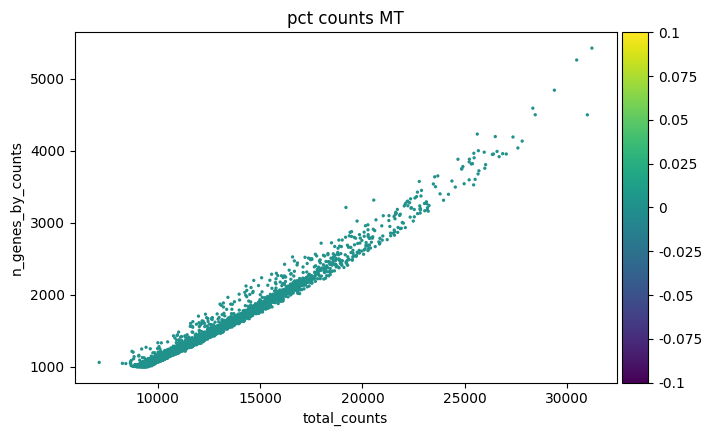

In [119]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [120]:
# we can also further filter for ribosomal contaminations using

bone_marrow_adata = bone_marrow_adata[
    bone_marrow_adata.obs['pct_counts_RIBO'] < 10,
    :
]


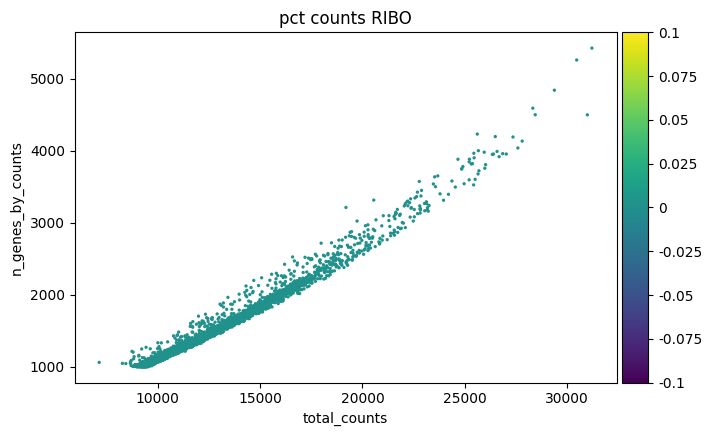

In [121]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [122]:
#doublet detection
##Identifying doublets is crucial as they can lead to misclassifications or
##distortions in downstream analysis steps

In [123]:
sc.pp.scrublet(bone_marrow_adata) #if you have multiple batch samples, you can specify it with batch_key="sample"

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [124]:
#Normalization

In [125]:
# Save a copy of the data
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [126]:
# Normalizing to median total counts
sc.pp.normalize_total(bone_marrow_adata)
# Logarithmize the data
sc.pp.log1p(bone_marrow_adata)

In [127]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)

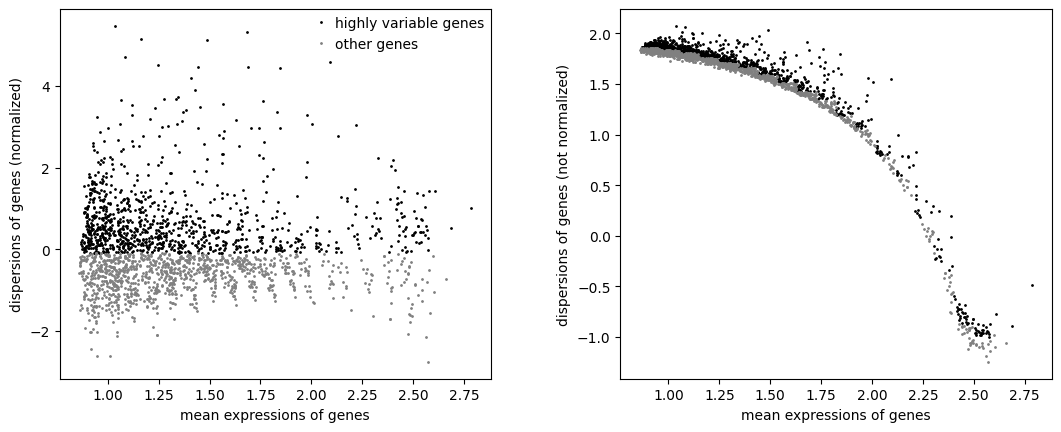

In [128]:
sc.pl.highly_variable_genes(bone_marrow_adata)
#left is normalized
#right is not

In [129]:
# Dimensionality Reduction (PCA)

In [130]:
sc.tl.pca(bone_marrow_adata)

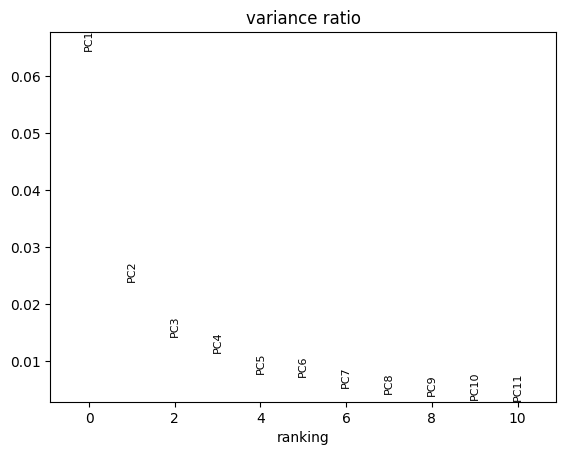

In [131]:
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

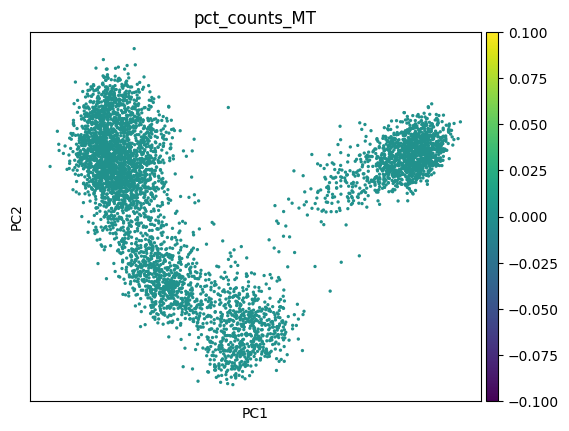

In [132]:
sc.pl.pca(
    bone_marrow_adata,
    color=["pct_counts_MT"]
)

In [133]:
## Nearest Neighbour
# Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
# basically we want to cluster the PCA components

In [134]:
sc.pp.neighbors(bone_marrow_adata)

In [135]:
sc.tl.umap(bone_marrow_adata)

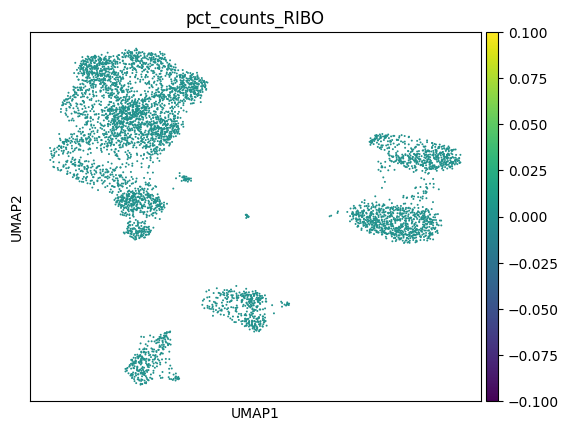

In [136]:
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [137]:
## Clustering by communities.

##Clustering by communities in single-cell RNA-seq is the process of grouping cells that show similar expression profiles — essentially, discovering putative cell types or states.

## Once PCA compresses your data into a manageable set of dimensions, clustering algorithms like Leiden operate on a graph-based representation of cell–cell relationships.

## Usually used for cell type detection

In [138]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)

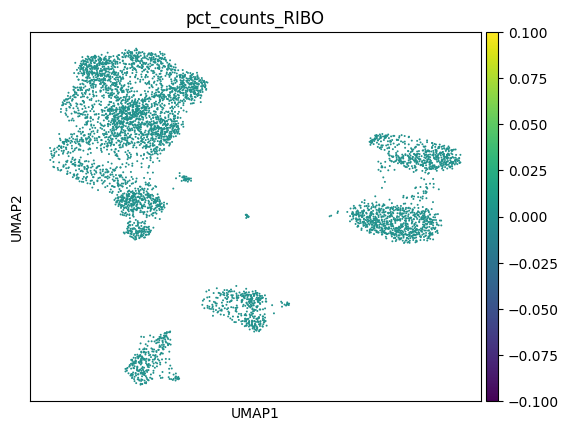

In [139]:
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

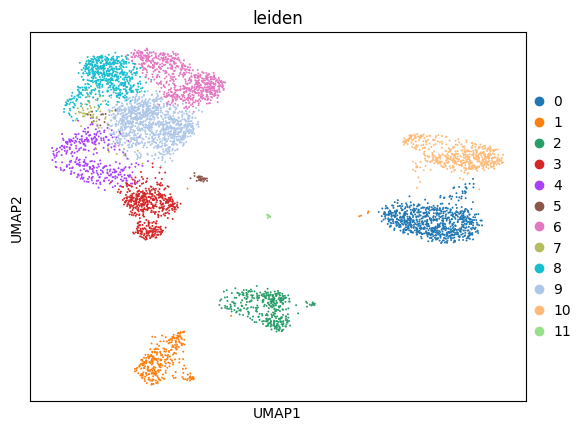

In [140]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size=8,
)

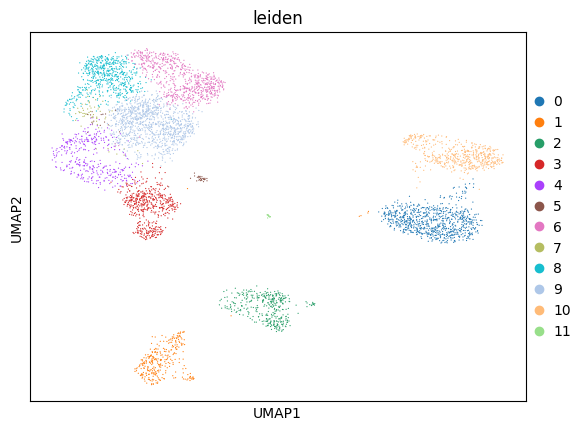

In [141]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

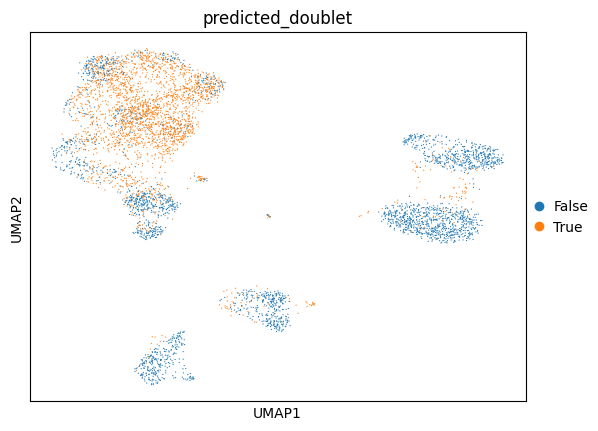

In [142]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

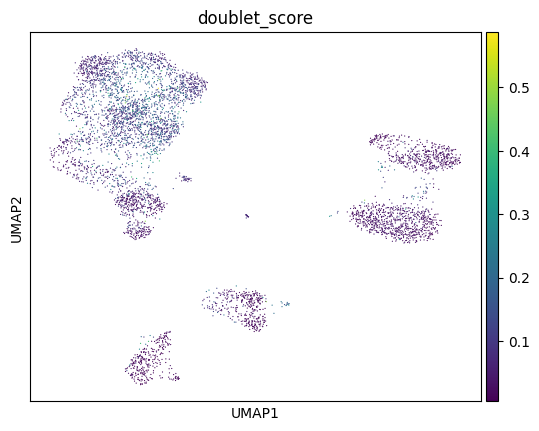

In [143]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [144]:
#Further reclustering

In [145]:
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

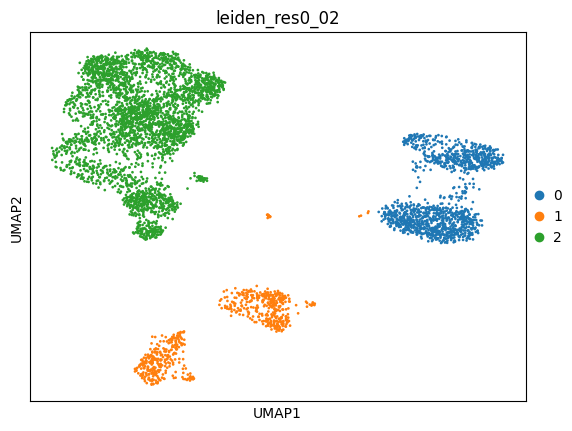

In [146]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

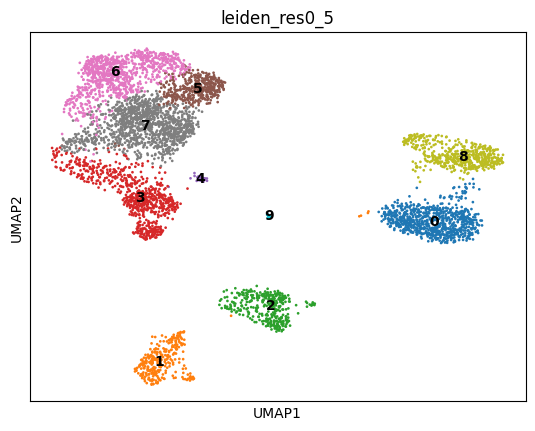

In [147]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

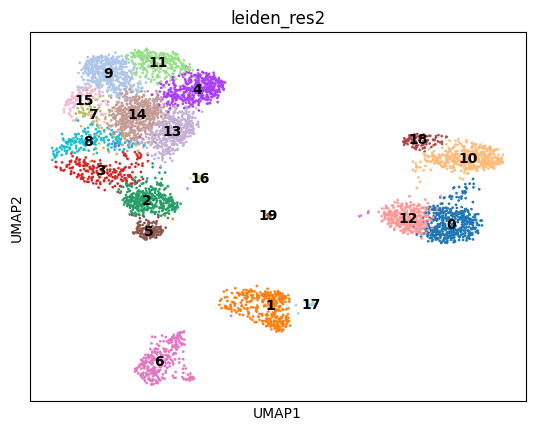

In [148]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

In [149]:
#Cell Annotation

In [150]:
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'


#this downloads the table of genes directly from ensemble

--2025-11-23 16:39:36--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-11-23 16:39:36--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [      <=>      

In [151]:
import pandas as pd

ensembl_var = pd.read_csv('/content/result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [152]:
import decoupler as dc

In [153]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [154]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [155]:
#load the gene expression matrix into dc

dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin = 3)

In [156]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 5262 × 71
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pc

In [157]:
#preview the data
bone_marrow_adata.obsm["score_ulm"].head()

,Adipocytes,Anterior pituitary gland cells,Astrocytes,B cells,B cells memory,B cells naive,Basal cells,Basophils,Bergmann glia,Cajal-Retzius cells,...,Pyramidal cells,Satellite glial cells,Sebocytes,Sertoli cells,T cells,T cytotoxic cells,T helper cells,T memory cells,Thymocytes,Tuft cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,1.311644,-0.679963,0.298487,-0.630624,-0.419594,-0.104835,-1.015433,0.865510,0.456314,0.867221,...,0.867221,0.955717,0.917982,0.897494,-2.924370,-2.023646,-1.650069,-1.733631,-2.338617,1.248986
Guo-AAACCTGCACACCGCA-4,-1.729611,-0.344898,0.287648,2.719248,3.080850,3.732685,-2.101477,-0.029900,-0.344898,-1.221687,...,1.185732,-1.221687,-1.221687,0.008936,-2.056749,-0.896093,0.200069,-1.292680,0.921521,0.092224
Guo-AAACCTGCATCCAACA-3,-0.840555,-1.375231,0.388333,0.210776,0.146935,0.003287,-0.363653,0.693984,-0.255416,-1.190560,...,0.002494,-1.190560,-1.190560,-1.190560,1.461609,0.040383,0.405705,1.323268,0.279757,0.060330
Guo-AAACCTGGTTCAGGCC-4,0.996734,-0.854137,-0.184568,-0.815854,0.722301,0.763675,-1.814965,-2.077936,0.343526,0.806366,...,0.784569,-1.563469,-0.465036,-1.563469,1.121883,0.210667,-0.456173,3.286157,-0.536015,-0.476229
Guo-AAACCTGTCAAGGTAA-2,1.221831,-1.690672,-0.099137,1.510811,0.834237,0.298789,-0.525238,-1.154290,0.412979,-1.463556,...,0.793841,-0.280989,-0.334548,-1.463556,2.222162,-0.473479,1.915821,-0.328607,-0.203043,0.441824


In [158]:
bone_marrow_adata.obsm["score_ulm"].columns

Index(['Adipocytes', 'Anterior pituitary gland cells', 'Astrocytes', 'B cells',
       'B cells memory', 'B cells naive', 'Basal cells', 'Basophils',
       'Bergmann glia', 'Cajal-Retzius cells', 'Cardiomyocytes',
       'Chondrocytes', 'Decidual cells', 'Dendritic cells',
       'Embryonic stem cells', 'Endothelial cells',
       'Endothelial cells (aorta)', 'Eosinophils', 'Epithelial cells',
       'Erythroblasts', 'Erythroid-like and erythroid precursor cells',
       'Fibroblasts', 'Gamma delta T cells', 'Germ cells',
       'Hematopoietic stem cells', 'Hepatocytes', 'Interneurons',
       'Keratinocytes', 'Kupffer cells', 'Langerhans cells',
       'Luminal epithelial cells', 'Luteal cells', 'Macrophages', 'Mast cells',
       'Megakaryocytes', 'Merkel cells', 'Mesangial cells', 'Microfold cells',
       'Microglia', 'Monocytes', 'Myeloid-derived suppressor cells',
       'Myocytes', 'Müller cells', 'NK cells', 'Natural killer T cells',
       'Neural stem/precursor cells', 'Neur

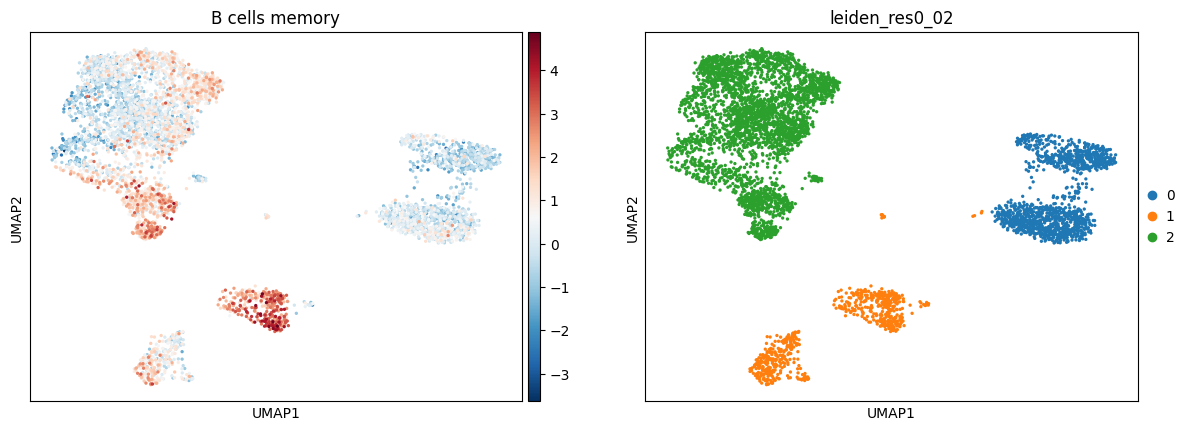

In [159]:
sc.pl.umap(score, color=["B cells memory", "leiden_res0_02"], cmap="RdBu_r")

In [160]:
import seaborn as sns

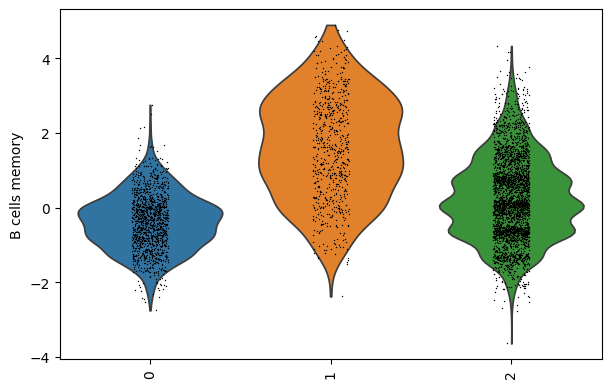

In [161]:
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_02", rotation=90)

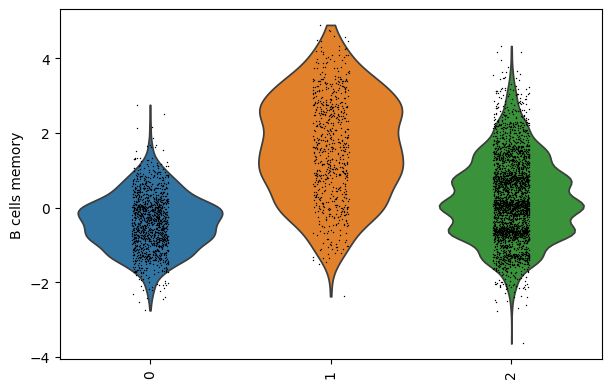

In [162]:
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_02", rotation=90)

In [163]:
#. Now let's know what each of the 7 clusters mean

In [164]:
# Original cell: bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_02", reference="rest", method="t-test_overestim_var")
# Problem: The bone_marrow_adata variable was accidentally overwritten with the result of this ranking function at some point.
# Fix: Ensure the ranking result is stored in a new variable, not bone_marrow_adata.

# Let's use a new variable name for the ranked results to avoid overwriting the AnnData object.
# Also, we need to use the original bone_marrow_adata as the first argument, not score, because
# dc.tl.rankby_group expects the original AnnData object, or at least one with the full feature space in .var.
# However, `score` itself is an AnnData object, so it can be used for ranking its own obsm attributes.
# The issue was that bone_marrow_adata *itself* became the rank DataFrame.

# To correct the overall workflow, you should re-run the notebook from the data loading stage (cell 'fkdi_jGOQEU_').
# After that, ensure that when you run THIS cell (kbyUa7C2bTPX), you assign the output to a *different* variable.

bone_marrow_adata_ranked_scores = dc.tl.rankby_group(score, groupby="leiden_res0_02", reference="rest", method="t-test_overestim_var")
bone_marrow_adata_ranked_scores = bone_marrow_adata_ranked_scores[bone_marrow_adata_ranked_scores["stat"] > 0]
bone_marrow_adata_ranked_scores.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Monocytes,134.451558,5.581511,0.0,0.0
1,0,rest,Kupffer cells,92.050129,2.206167,0.0,0.0
2,0,rest,Dendritic cells,89.458914,3.438588,0.0,0.0
3,0,rest,Neutrophils,80.114848,3.051523,0.0,0.0
4,0,rest,Myeloid-derived suppressor cells,55.111770,1.746183,0.0,0.0


In [165]:
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-243225156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [166]:
cluster_annotations

{'0': 'Monocytes', '1': 'B cells', '2': 'T cells'}

In [170]:
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_02'].map(cluster_annotations)

In [171]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(bone_marrow_adata.var_names)

b_cell_markers = markers[markers['source'].isin(['B cells memory'])]['target']
b_cell_markers = b_cell_markers[b_cell_markers.isin(available_genes)]

nk_cell_markers = markers[markers['source'].isin(['Natural killer T cells'])]['target']
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]

t_cells_markers = markers[markers['source'].isin(['T cells'])]['target']
t_cells_markers = t_cells_markers[t_cells_markers.isin(available_genes)]


#display(b_cell_markers)

In [172]:
marker_genes_dict = {
    "B cells": b_cell_markers.head().tolist(),
    "NK cells": nk_cell_markers.head().tolist(),
    "T cells": t_cells_markers.head().tolist()
}

categories: Monocytes, B cells, T cells
var_group_labels: B cells, NK cells, T cells


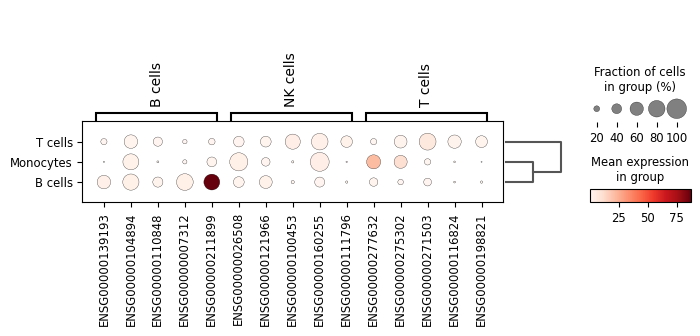

In [173]:
sc.pl.dotplot(bone_marrow_adata, marker_genes_dict, "cell_type", dendrogram=True)

categories: 0, 1, 2
var_group_labels: B cells, NK cells, T cells


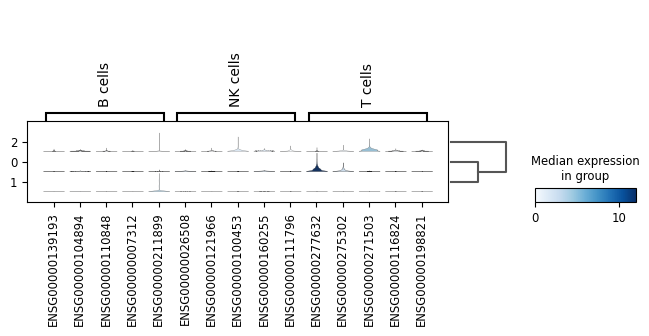

In [175]:
sc.pl.stacked_violin(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_02",  dendrogram=True
)

categories: 0, 1, 2
var_group_labels: B cells, NK cells, T cells


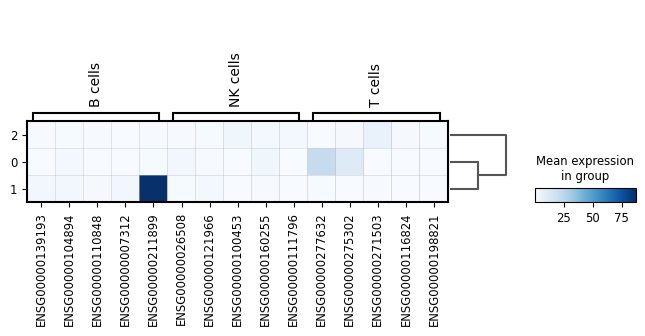

In [176]:
sc.pl.matrixplot(
    bone_marrow_adata,
    marker_genes_dict,
    "leiden_res0_02",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2
var_group_labels: B cells, NK cells, T cells


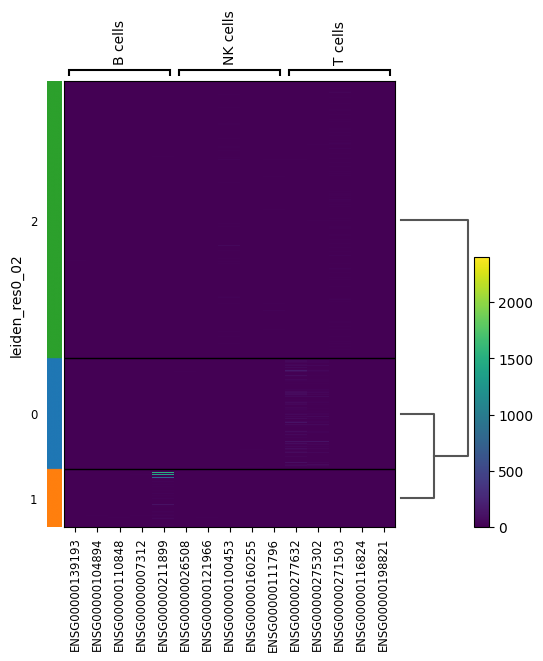

In [177]:
sc.pl.heatmap(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_02", cmap="viridis", dendrogram=True
)

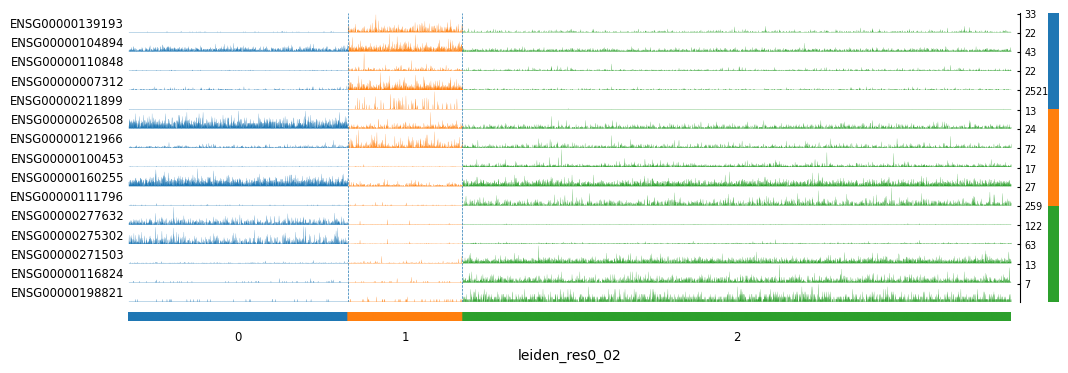

In [179]:
# @title Using genome tracks
sc.pl.tracksplot(bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_02", dendrogram=False)